# Computing Convex Hulls
As described [here](https://medium.com/all-about-algorithms/computing-convex-hulls-b08c9c48ab5a).

In [1]:
def check_is_left(a, b, c):
    return (b[0] - a[0]) * (c[1] - a[1]) - (b[1] - a[1]) * (c[0] - a[0]) > 0

In [2]:
check_is_left((0, 0), (1, 1), (0, 1))

True

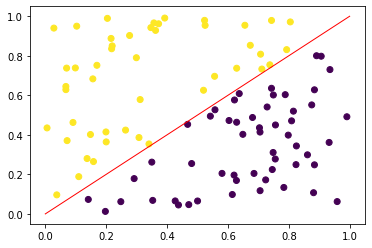

In [3]:
import random
import matplotlib.pyplot as plt


plt.plot([0, 1], [0, 1], c="r", linewidth=1)  # line between (0, 0) and (1, 1)
points = {"x": [], "y": [], "color": []}

for _ in range(100):
    x = random.random()
    y = random.random()
    points["x"].append(x)
    points["y"].append(y)
    points["color"].append(check_is_left((0, 0), (1, 1), (x, y))),

plt.scatter(points["x"], points["y"], c=points["color"])

(-1.5505645358104905, 2.7991909106442923, -1.42608803415992, 1.659548934281522)

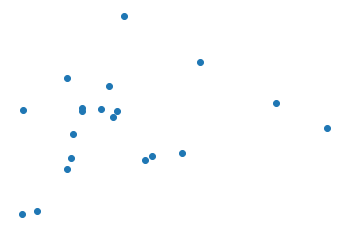

In [4]:
random.seed(123)

points = [(random.normalvariate(0, 1), random.normalvariate(0, 1)) for _ in range(20)]

plt.scatter(
    [p[0] for p in points],
    [p[1] for p in points],
)
plt.axis("off")

In [5]:
def hull_naive(points):  # n points
    hull_edges = []
    for i, a in enumerate(points):  # all start points, O(n)
        for j, b in enumerate(points):  # all end points, O(n)
            if i != j:
                on_hull = True
                for k, c in enumerate(points):  # all other points, O(n)
                    if k not in (i, j) and not check_is_left(a, b, c):
                        on_hull = False
                        break
                if on_hull:
                    hull_edges.append((i, j))  # add indices of the points
    return hull_edges

In [6]:
hull_naive(points)

[(4, 17), (7, 14), (10, 4), (14, 10), (17, 7)]

In [7]:
def make_path(hull_edges):  # h edges
    hull_dict = dict(hull_edges)
    hull = [hull_edges[0][0], hull_edges[0][1]]

    while hull[-1] != hull[0]:  # O(h)
        hull.append(hull_dict[hull[-1]])

    return hull


hull_egdes = hull_naive(points)
make_path(hull_egdes)

[4, 17, 7, 14, 10, 4]

In [8]:
def gift_wrapping(points):
    start = min(enumerate(points), key=lambda x: x[1])[0]  # step 1
    hull = []
    n = len(points)

    while True:  # O(h) times
        hull.append(start)

        while True:  # step 2, I really miss do-while loops in Python
            end = random.choice(range(n))
            if end != start:
                break

        for other in range(n):  # step 3, O(n)
            if check_is_left(points[start], points[end], points[other]):
                end = other  # step 3

        if end == hull[0]:
            return hull + [end]  # step 4, terminate
        else:
            start = end  # step 4, continue

In [9]:
gift_wrapping(points)

[4, 10, 14, 7, 17, 4]